# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.


SDA Project. Sprint 3 

 
The goal of this analysis is to organize and compare the difference in revenue for two specific plans offered by Megaline. To achieve this, we will read and assess the data provided. We will then organize and examine the data, then addressing any duplicates or missing values that can skew our outcome. We will then begin analyzing further and start visualizing the data. Finally, we will have a clear view of the revenue gained by both plans offered. 
    
Heather Marie Culligan
    
Nov.15 2024
</div>

## Initialization

First, we have to import our libraries to help us organize, manipulate, and vizulize our data. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns
import math

## Load data

Next, we have to import all our datasets. 

In [2]:
calls= pd.read_csv('/datasets/megaline_calls.csv')
internet= pd.read_csv('/datasets/megaline_internet.csv')
messages= pd.read_csv('/datasets/megaline_messages.csv')
plans_df= pd.read_csv('/datasets/megaline_plans.csv')
users= pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

Now, it is time to start addressing and organizing our data to help us to understand what adjustments we need to fix, working on one dataset at a time for now. 

## Plans

In [3]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In the info() cell, we see there is no missing values. We will have to investigate to verify there are no duplicate values. We do have to adjust some datatypes as well so we can better utilize our tools. 

## Fix data

Let's fix the datatypes now. Also, we will adjust and add a column of GB for clarification later due to plan specifications. 

In [5]:
plans_df['usd_monthly_pay']=plans_df['usd_monthly_pay'].astype('float64')
plans_df['usd_per_gb']=plans_df['usd_per_gb'].astype('float64')
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included']/1024

Based on our original info() cell, there are no missing values. There are only two rows to this dataset, and we can see by calling info there are no duplicates within the set. Time to review the next dataset. 

## Users

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


There are missing values within the 'churn_date' column that we will have to address and we also have to check for duplicate values. We also have a few inappropriate datatypes we need to fix before moving on. 

### Fix Data

Lets address the incorrect datatypes and remove the column with all the missing values. The column we are removing has less than 7% of the actual data we would expect with a full column. Removing this will not negativly effect the results but leaving it will skew data. 

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
churn=users['churn_date']
users= users.dropna(axis='columns')

### Enrich Data

In [9]:
users.duplicated().sum() 

0

Great, no duplicate lines within the dataset. Let's move onto the next dataset. 

## Calls

In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Fix data

Lets start by fixing the datatype. We are changing the 'call_date' column to a datetime format to help later. Then we are adjusting the duration column to help fit into the terms of the plans. 

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enrich data

In [13]:
calls['month']= calls['call_date'].dt.month
calls['year']=calls['call_date'].dt.year
calls['duration']=np.ceil(calls['duration']).astype(int)

calls.duplicated().sum()

0

Overall in the above section there were no missing values or duplicate rows, except for the 'churn_date' column, which was largely missing and subsequently dropped. Data types were adjusted to facilitate analysis, including converting dates to datetime formats and rounding up call durations, as per the plan’s requirements.

## Messages

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The info() cell shows us no missing values. We will have to check for duplicate values. There is a datatype we need to adjust though. 

### Fix data

Let's fix the datatype for this set. 

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_id']= messages['id'].astype('int')

### Enrich data

In [17]:
messages ['month']= messages ['message_date'].dt.month
messages ['year']= messages ['message_date'].dt.year

messages.duplicated().sum()

0

Again, no duplicate values to worry about here. Let's move on to the next dataset. 

## Internet

In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 Info() cell shows no missing values. As usual we will have to investigate to make sure there are no duplicate values within our set. We do see a datatype that needs to be changed before we move on. 

### Fix data

Lets fix that datatype. 

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

In [21]:
internet ['month']= internet ['session_date'].dt.month
internet ['year']= internet ['session_date'].dt.year

internet.duplicated().sum()

0

Lastly, no duplicate values within this dataset. Great! Lets move on to further analyze our data. 

## Study plan conditions

Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Aggregate data per user


Lets start organizing the data and pulling out the information we need for our analysis, keeping in mind the information above about the plans and how they calculate the information.  

Calculating the number of calls made by each user per month:

In [22]:
calls['rounded_duration']= round(calls['duration'])
calls_per_month = calls.groupby(['user_id','year','month']).agg({'rounded_duration': 'count'}).reset_index()

Calculating the amount of minutes spent by each user per month:

In [23]:
minutes_per_month= calls.groupby(['user_id', 'year', 'month'])['duration'].sum().reset_index()

Calculating the number of messages sent by each user per month:

In [24]:
messages_sent_monthly= messages.groupby(['user_id','year','month']).agg({'message_id': 'count'}).reset_index( )

Calculating the volume of internet traffic used by each user per month ((in MB) then adjusting to GB):

In [25]:
mb_used_monthly= internet.groupby(['user_id', 'year', 'month']).agg({'mb_used':'sum'}).reset_index()
mb_used_monthly['gb_used']=(mb_used_monthly['mb_used'] / 1024)
mb_used_monthly['gb_used']=np.ceil(mb_used_monthly['gb_used']).astype(int)

Lets merge all the information we just organized into one full datset:

In [26]:
plans_df.rename(columns={'plan_name': 'plan'}, inplace=True)

In [27]:
merged_df= pd.merge(calls_per_month, minutes_per_month, on=['user_id','year','month'], how='outer')
merged_df= pd.merge(merged_df, messages_sent_monthly, on=['user_id','year','month'],how='outer')
merged_df= pd.merge(merged_df, mb_used_monthly, on=['user_id','year','month'],how='outer')
merged_df= pd.merge(merged_df, users[['user_id', 'plan', 'city']], on='user_id', how='left')
merged_df= pd.merge(merged_df, plans_df, on='plan', how='left')
merged_df.fillna({'city': 'Unknown', 'plan': 'Unknown'}, inplace=True)
merged_df.fillna(0, inplace=True)
merged_df.rename(columns={'message_id': 'messages_sent'}, inplace=True)
merged_df.rename(columns={'rounded_duration': 'call_count'}, inplace=True)
merged_df.rename(columns={'duration': 'total_minutes'}, inplace=True)
merged_df

,user_id,year,month,call_count,total_minutes,messages_sent,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70.0,7.0,0.01,0.01,30.0
1,1001,2018,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
2,1001,2018,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
3,1001,2018,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
4,1001,2018,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
2289,1361,2018,5,0.0,0.0,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA",50,15360,500,20.0,10.0,0.03,0.03,15.0
2290,1482,2018,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70.0,7.0,0.01,0.01,30.0
2291,1108,2018,12,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,70.0,7.0,0.01,0.01,30.0


Recap of the plan details for us to use later:

In [28]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


In [29]:
def calculate_revenue(row):
    plan = plans_df.loc[plans_df['plan'] == row['plan']].iloc[0]
    call_cost = max(0, row['total_minutes'] - plan['minutes_included']) * plan['usd_per_minute']
    message_cost = max(0, row['messages_sent'] - plan['messages_included']) * plan['usd_per_message']
    data_cost = max(0, row['gb_used'] - plan['gb_per_month_included']) * plan['usd_per_gb']
     
    total_cost = call_cost + message_cost + data_cost + plan['usd_monthly_pay']
    
    return total_cost

merged_df['monthly_revenue'] = merged_df.apply(calculate_revenue, axis=1)

## Study user behaviour

### Calls

Visualizing a comparative average duration of calls per plan per month:

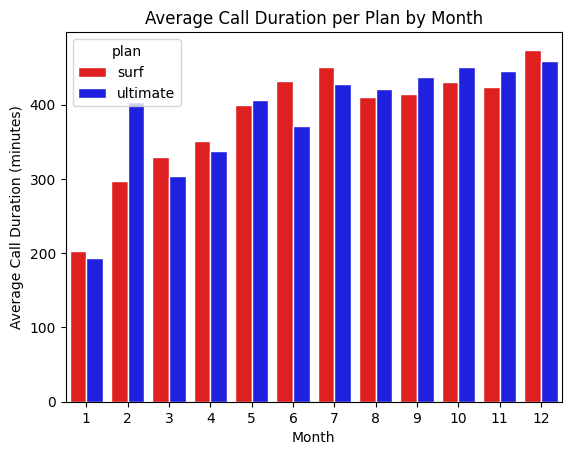

In [30]:
avg_call_duration = merged_df.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()
custom_palette = {
    'surf': 'red',
    'ultimate': 'blue'
}
sns.barplot(data=avg_call_duration, x='month', y='total_minutes',hue='plan', palette=custom_palette,edgecolor='white')
plt.title('Average Call Duration per Plan by Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.show()

Above shows that surf users tend to use more minutes in January than the utimate users but ultimate customers use many more minutes than surf in February. 

Visualizing a comparative average duration of minutes users of each plan require per month:

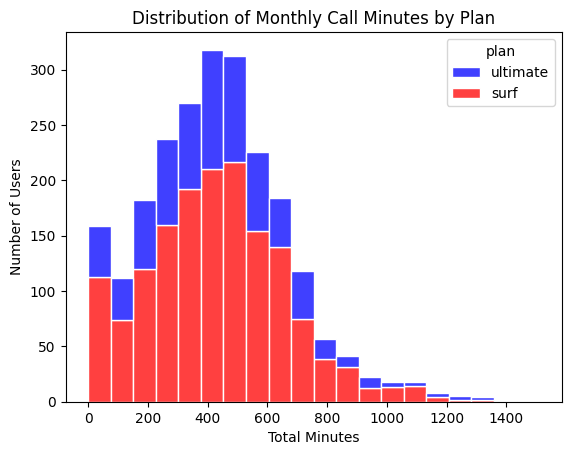

In [31]:
sns.histplot(data=merged_df, x='total_minutes', hue='plan',palette=custom_palette, multiple='stack', edgecolor='white', bins=20)
plt.title('Distribution of Monthly Call Minutes by Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Number of Users')
plt.show()

Ultimate users sent significantly more messages per month than surf users, highlighting a greater reliance on messaging for ultimate users.

Here's the mean and the varience of the monthly call duration:

In [32]:
mean_variance_call_duration = merged_df.groupby('plan')['total_minutes'].agg(['mean', 'var', 'std']).reset_index()
mean_variance_call_duration

,plan,mean,var,std
0,surf,428.749523,54968.279461,234.453150
1,ultimate,430.450000,57844.464812,240.508762


There was a slight variance in usage between the two plans, so customers on both plans tend to use a similar amount of call time on average, suggesting that the difference in plan type does not significantly impact how much customers use their phones for calls.

Visualizing the distribution of the users call durations per month:

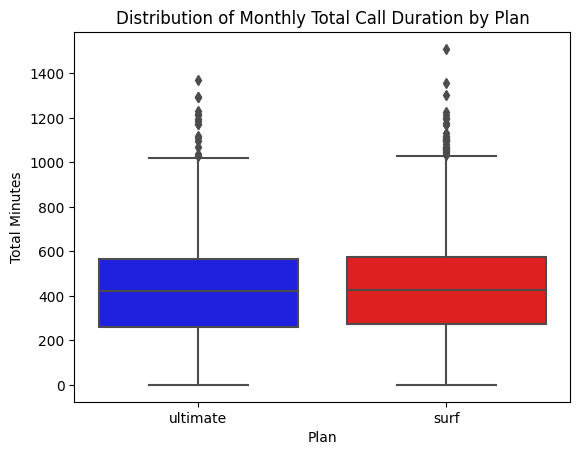

In [33]:
sns.boxplot(data=merged_df, x='plan', y='total_minutes',palette=custom_palette)
plt.title('Distribution of Monthly Total Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Minutes')
plt.show()

Based on the information above there is not much difference between the call duration behaviors of users and difference in plans. The average call duration is within five minutes difference of each other based on plan. 

### Messages

Visualizing the distribution of the users number of messages per month per plan:

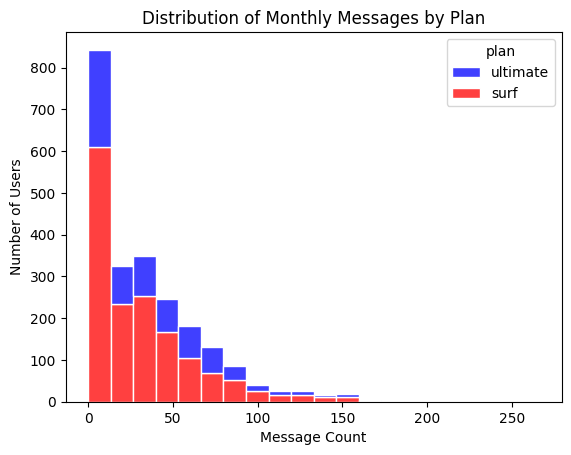

In [34]:
sns.histplot(data=merged_df, x='messages_sent', hue='plan', multiple='stack', edgecolor='white',palette=custom_palette, bins=20)
plt.title('Distribution of Monthly Messages by Plan')
plt.xlabel('Message Count')
plt.ylabel('Number of Users')
plt.show()

Ultimate users sent significantly more messages per month than surf users, highlighting a greater reliance on messaging for ultimate users.

In [35]:
mean_variance_message_count = merged_df.groupby('plan')['messages_sent'].agg(['mean', 'var', 'std']).reset_index()
mean_variance_message_count

,plan,mean,var,std
0,surf,31.159568,1126.724522,33.566717
1,ultimate,37.551389,1208.756744,34.767179


****************************************

### Internet

Visualizing the distribution of the users monthly internet usage per plan:

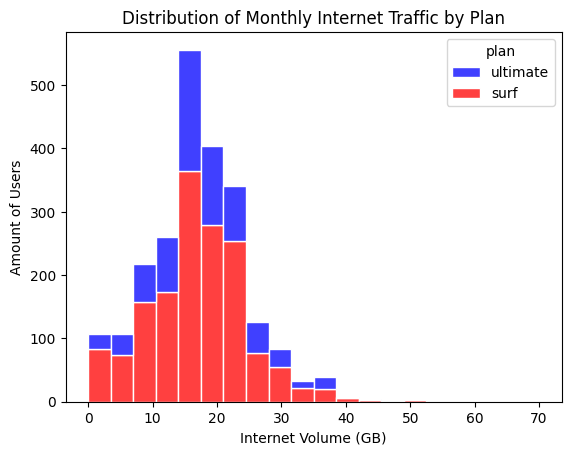

In [36]:
sns.histplot(data=merged_df, x='gb_used', hue='plan', multiple='stack', edgecolor='white',palette=custom_palette, bins=20)
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Internet Volume (GB)')
plt.ylabel('Amount of Users')
plt.show()

The above graph shows the ultimate users are definately using more GB in internet usage than the surf users. 

Visualizing the distribution of the users internet usage per month per plan:

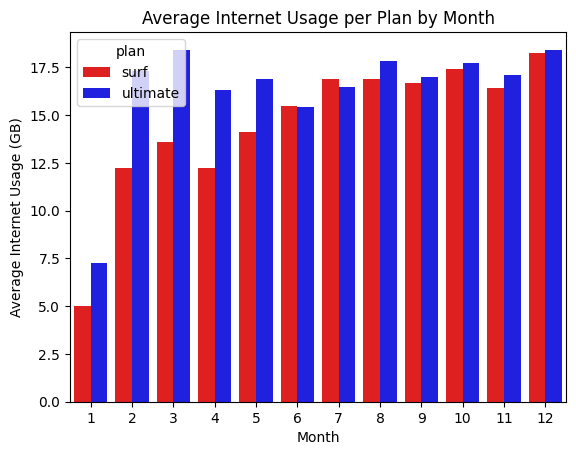

In [37]:
avg_internet_usage = merged_df.groupby(['plan', 'month'])['gb_used'].mean().reset_index()
sns.barplot(data=avg_internet_usage, x='month', y='gb_used', hue='plan',palette=custom_palette)
plt.title('Average Internet Usage per Plan by Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (GB)')
plt.show()

 Ultimate users consistently used more data than Surf users, with noticeable differences in February and March.

Comparing the number of GB users of each plan require each month:

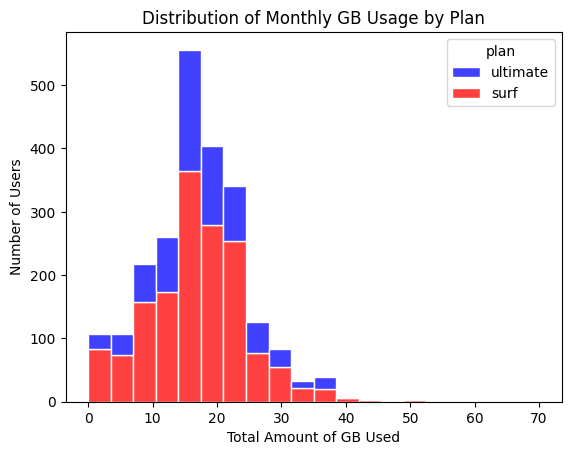

In [38]:
sns.histplot(data=merged_df, x='gb_used', hue='plan', multiple='stack', edgecolor='white',palette=custom_palette, bins=20)
plt.title('Distribution of Monthly GB Usage by Plan')
plt.xlabel('Total Amount of GB Used')
plt.ylabel('Number of Users')
plt.show()

More ultimate users are using significantly more data than surf users monthly. 

Calculating the mean and the variance of the monthly internet usage:

In [39]:
mean_variance_internet_usage= merged_df.groupby('plan')['gb_used'].agg(['mean', 'var', 'std']).reset_index()
mean_variance_internet_usage

,plan,mean,var,std
0,surf,16.670693,61.58360,7.847522
1,ultimate,17.306944,58.83055,7.670108


The mean and variance for internet usage between the two plans were similar, but ultimate users still showed a slightly higher average, indicating heavier data users.

Visualizing the distribution of the users internet usage per month:

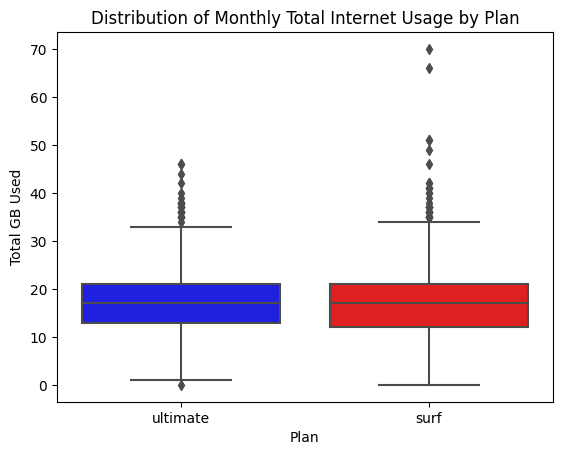

In [40]:
sns.boxplot(data=merged_df, x='plan', y='gb_used',palette=custom_palette)
plt.title('Distribution of Monthly Total Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Total GB Used')
plt.show()

Overall the ultimate plan users do tend to use more GB per month. 

## Revenue

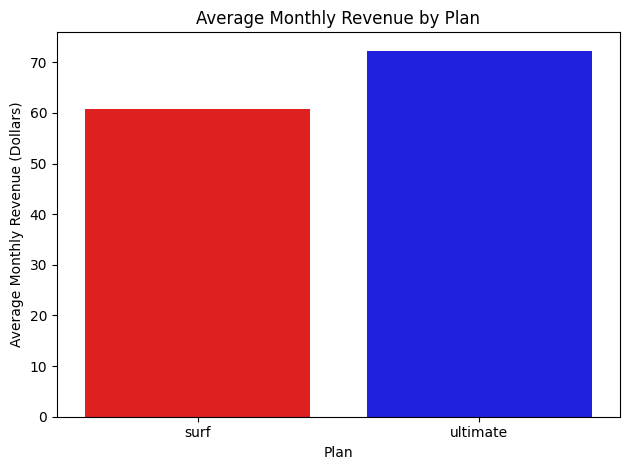

In [41]:
ultimate_revenue = merged_df.loc[merged_df['plan'] == 'ultimate', 'monthly_revenue']
surf_revenue = merged_df.loc[merged_df['plan'] == 'surf', 'monthly_revenue']
avg_revenue = merged_df.groupby('plan')['monthly_revenue'].mean().reset_index()
plt.figure
sns.barplot(data=avg_revenue, x='plan', y='monthly_revenue',palette=custom_palette)
plt.title('Average Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Average Monthly Revenue (Dollars)')
plt.tight_layout()
plt.show()

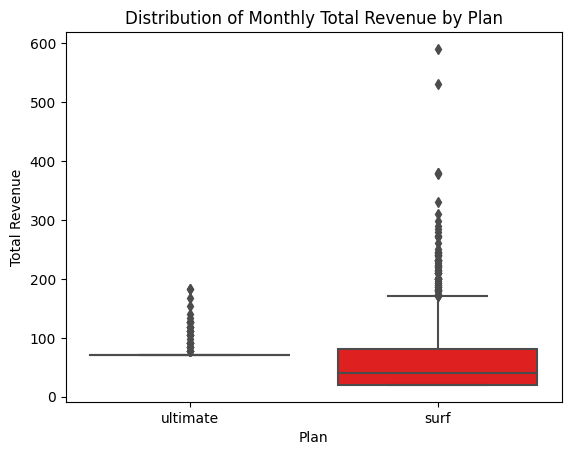

In [42]:
sns.boxplot(data=merged_df, x='plan', y='monthly_revenue',palette=custom_palette)
plt.title('Distribution of Monthly Total Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Revenue')
plt.show()

In [43]:
merged_df['monthly_revenue'].unique()

array([ 70.  ,  20.  ,  90.09,  60.  , 158.12,  80.  , 110.  , 150.  ,
        90.  ,  40.  ,  84.  , 110.03, 244.62, 110.72, 163.51,  71.02,
        69.69, 181.4 , 116.93,  88.28, 107.2 , 126.42, 117.68,  74.68,
        30.96,  41.59,  25.94,  74.11,  43.03,  46.33,  38.84,  50.54,
       144.47, 160.11,  24.08, 152.34, 100.  ,  83.93,  20.3 ,  62.22,
        52.55,  21.92,  30.  , 112.  , 119.  ,  91.  , 126.  , 140.  ,
       182.  , 154.  ,  27.89,  55.76,  24.14,  83.96,  34.29, 168.  ,
        77.  , 122.01,  43.69,  90.3 , 120.21, 120.66, 132.28, 120.  ,
        24.32,  20.06, 167.48,  70.33,  50.  ,  20.54,  30.87,  21.32,
        20.72,  70.66,  21.35,  30.84, 105.  ,  21.98,  24.38, 135.22,
       116.27,  62.85, 129.81,  93.96,  41.89,  54.32,  20.84,  46.69,
        73.78,  80.42,  50.3 ,  72.46,  20.63,  21.26, 143.9 , 143.42,
       200.  , 210.  ,  20.93,  20.42,  20.03, 123.18, 102.85,  83.27,
        82.67,  32.46,  90.86,  55.49,  47.59,  26.09,  31.19,  26.15,
      

In [44]:
ultimate_revenue = merged_df.loc[merged_df['plan'] == 'ultimate', 'monthly_revenue']
surf_revenue = merged_df.loc[merged_df['plan'] == 'surf', 'monthly_revenue']

In [45]:
mean_variance_revenue= merged_df.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'std']).reset_index()
mean_variance_revenue

,plan,mean,var,std
0,surf,60.706408,3067.835152,55.388042
1,ultimate,72.313889,129.848486,11.395108


The ultimate plan generated more average monthly revenue compared to the surf plan. The variance in revenue for surf users was also significantly higher, suggesting greater variability in spending among surf users.

## Test statistical hypotheses

Does the average revenue from users of the Ultimate and Surf plans differ?

Using a two-sample t-test to compare average revenues of the Ultimate and Surf plans. The null hypothesis (H0) states there is no significant difference between the average revenues, while the alternative hypothesis (H1) suggests there is a significant difference, without specifying the direction. The t-test assumes normal data distribution and independent samples. A significance level of 0.05 was chosen, representing a 5% chance of incorrectly rejecting H0, which balances reliability and risk of error.

In [46]:
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in average revenue between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in average revenue between Ultimate and Surf plans.")

T-statistic: 7.952094891333888
P-value: 3.1703905481135734e-15
Reject the null hypothesis - there is a significant difference in average revenue between Ultimate and Surf plans.


Average revenue from users in the NY-NJ area is different from that of the users from the other regions?

Using a two-sample t-test below to compare the average revenue between users from the NY-NJ region and users from other regions. The null hypothesis (H0) states that there is no significant difference in average revenue between the two groups, while the alternative hypothesis (H1) suggests there is a difference. This t-test is appropriate because we have two independent groups. A significance level of 0.05 was chosen, representing a 5% risk of incorrectly rejecting H0, balancing reliability and the risk of error.

In [47]:
ny_nj_revenue = merged_df.loc[merged_df['city'].str.contains('NY-NJ', na=False), 'monthly_revenue'].dropna()
other_region_revenue = merged_df.loc[~merged_df['city'].str.contains('NY-NJ', na=False), 'monthly_revenue'].dropna()

t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_region_revenue, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in average revenue between NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in average revenue between NY-NJ and other regions.")


T-statistic: -2.1309454999502133
P-value: 0.0335256158853001
Reject the null hypothesis - there is a significant difference in average revenue between NY-NJ and other regions.


## General conclusion


In this analysis, we explored user behavior and revenue for the Ultimate and Surf plans. A two-sample t-test showed that Ultimate users generate significantly more revenue than Surf users. We also found a significant difference in revenue between users in the NY-NJ area and other regions, suggesting some regional influence.
Ultimate users had higher activity in call minutes, messages, internet usage, and overall revenue, making them more valuable compared to Surf users. There was no significant difference in call usage between the two plans, but Ultimate users sent more messages and used more data, indicating higher engagement.
These findings show how different plans and user locations affect revenue. Further research could segment users by age or demographics to uncover more insights. Identifying ways to increase Surf user revenue could also help optimize plans and boost profits.

In summary, Ultimate users generate more revenue, both on average and consistently. While call usage was similar, Ultimate users were more engaged in messaging and internet, making them more valuable. These insights suggest opportunities to increase revenue by encouraging higher engagement from Surf users.